#Proyecto del M√≥dulo 7: T√©cnicas avanzadas para ciencia de datos y empleabilidad

#1: Introducci√≥n y Objetivo del Proyecto

##Objetivo General

El prop√≥sito de este proyecto es aplicar de manera integral las t√©cnicas de an√°lisis, procesamiento y modelado vistas durante el Bootcamp de Ciencia de Datos e Inteligencia Artificial, mediante la creaci√≥n de un sistema automatizado para el diagn√≥stico de neumon√≠a a partir de radiograf√≠as de t√≥rax.

El enfoque principal est√° puesto en construir un modelo de visi√≥n por computadora utilizando redes neuronales convolucionales (CNN), que permita distinguir entre radiograf√≠as normales y aquellas que presentan signos de neumon√≠a.

##Contexto del problema

La neumon√≠a es una condici√≥n respiratoria que puede ser mortal si no se detecta a tiempo. En muchos centros de salud con recursos limitados, no siempre se cuenta con radi√≥logos para interpretar im√°genes m√©dicas de manera r√°pida y eficaz.

El uso de algoritmos de aprendizaje profundo puede facilitar esta tarea, ayudando a mejorar los tiempos de diagn√≥stico y reduciendo la carga sobre los profesionales de la salud.

##Descripci√≥n del Dataset

El dataset proviene de Kaggle:
üîó Chest X-Ray Images (Pneumonia)

Contiene im√°genes de t√≥rax clasificadas manualmente por profesionales m√©dicos en dos categor√≠as:

NORMAL: Radiograf√≠as sin signos de neumon√≠a.
PNEUMONIA: Radiograf√≠as con diagn√≥stico positivo.
El dataset est√° organizado en la carpeta chest_xray en tres subconjuntos:


1.   Train/
*   Normal
*   Pneumonia

2.   val/
*   Normal
*   Pneumonia

3.   test/
*   Normal
*   Pneumonia






##Metodolog√≠a del proyecto

El proyecto se desarrollar√° en las siguientes etapas:

1.- Exploraci√≥n y an√°lisis de datos (EDA)
Revisi√≥n visual de im√°genes, distribuci√≥n por clase, detecci√≥n de desbalance.

2.- Preprocesamiento y limpieza
Redimensionamiento, normalizaci√≥n y preparaci√≥n de datos para entrenamiento.

3.- Entrenamiento de modelo CNN
Dise√±o, compilaci√≥n y entrenamiento del modelo con validaci√≥n.

4.- Evaluaci√≥n y visualizaci√≥n
C√°lculo de m√©tricas como accuracy y recall. Curvas ROC y gr√°ficos personalizados.

5.- Tuning y ensembling
Ajuste de hiperpar√°metros y combinaci√≥n de modelos para mejorar resultados.

6.- Despliegue en la nube
Construcci√≥n de una API REST que reciba una imagen y devuelva la predicci√≥n.

#2. Carga y Exploraci√≥n de Im√°genes (EDA)

Antes de entrenar cualquier modelo, es esencial conocer en profundidad los datos disponibles. Este cap√≠tulo se enfoca en:

*   Conocer la estructura de carpetas del dataset.
*   Verificar cu√°ntas im√°genes hay por clase y subconjunto.
*   Detectar si existen desbalances de clases.
*   Visualizar ejemplos de im√°genes para identificar patrones visuales.
*   Evaluar si hay problemas potenciales (resoluci√≥n, formato, etc.).

##Paso 1: Montar Google Drive (en Google Colab)

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Paso 2: Definir la ruta del dataset

In [2]:
#  Ruta hacia el dataset en tu Google Drive
dataset_path ='/content/drive/MyDrive/Colab Notebooks/chest_xray'

##Paso 3: Contar im√°genes por clase y subconjunto

In [3]:
import os
import pandas as pd

def contar_imagenes(path):
    conteo = []
    for subset in ['train', 'val', 'test']:
        for clase in ['NORMAL', 'PNEUMONIA']:
            folder = os.path.join(path, subset, clase)
            cantidad = len(os.listdir(folder))
            conteo.append({
                'Conjunto': subset.upper(),
                'Clase': clase,
                'Cantidad': cantidad
            })
    return pd.DataFrame(conteo)

conteo_df = contar_imagenes(dataset_path)
conteo_df


Conjunto      Clase  Cantidad
0    TRAIN     NORMAL      1341
1    TRAIN  PNEUMONIA      3875
2      VAL     NORMAL         8
3      VAL  PNEUMONIA         8
4     TEST     NORMAL       234
5     TEST  PNEUMONIA       390

##Paso 4: Visualizaci√≥n de la distribuci√≥n

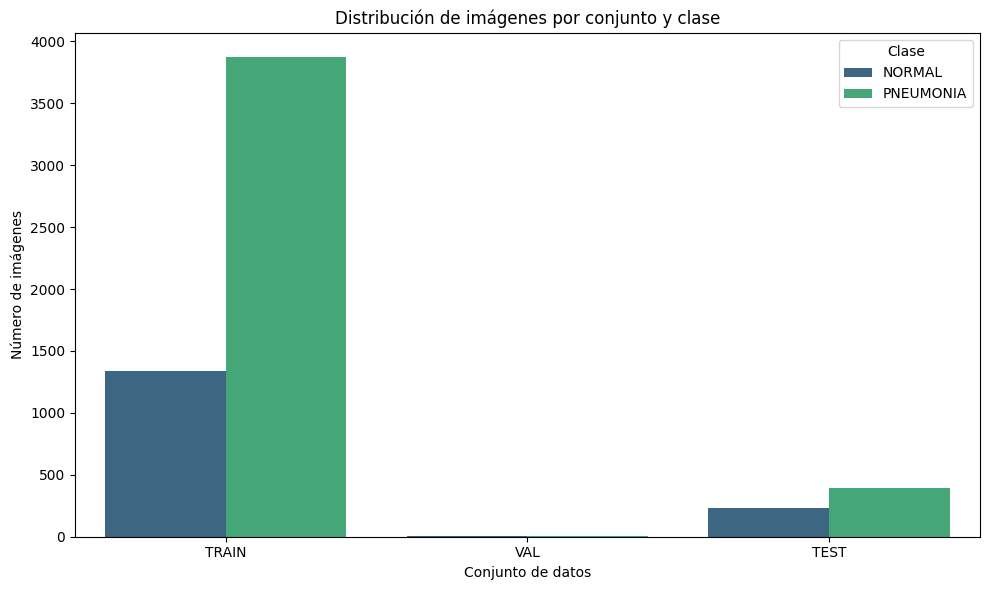

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=conteo_df, x='Conjunto', y='Cantidad', hue='Clase', palette='viridis')
plt.title("Distribuci√≥n de im√°genes por conjunto y clase")
plt.ylabel("N√∫mero de im√°genes")
plt.xlabel("Conjunto de datos")
plt.legend(title="Clase")
plt.tight_layout()
plt.show()


train contiene la mayor√≠a de las im√°genes y presenta un desbalance claro: hay muchas m√°s im√°genes de neumon√≠a que normales.
val y test tienen menos datos, pero una proporci√≥n similar.
Este desbalance puede generar un sesgo hacia la clase mayoritaria durante el entrenamiento. M√°s adelante aplicaremos data augmentation para mitigar este problema.

##Paso 5: Visualizaci√≥n de im√°genes de ejemplo

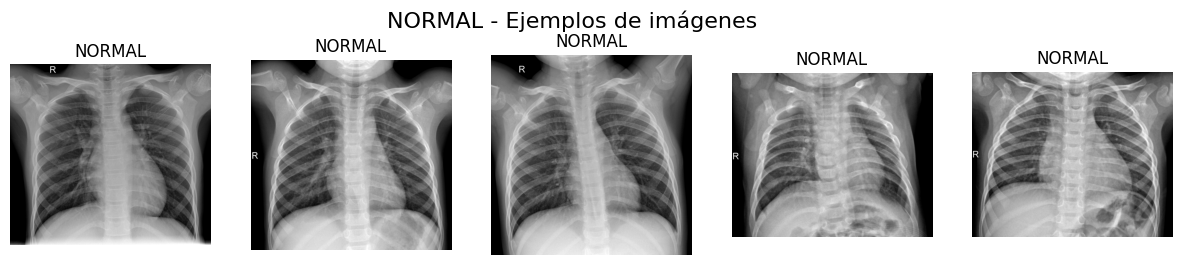

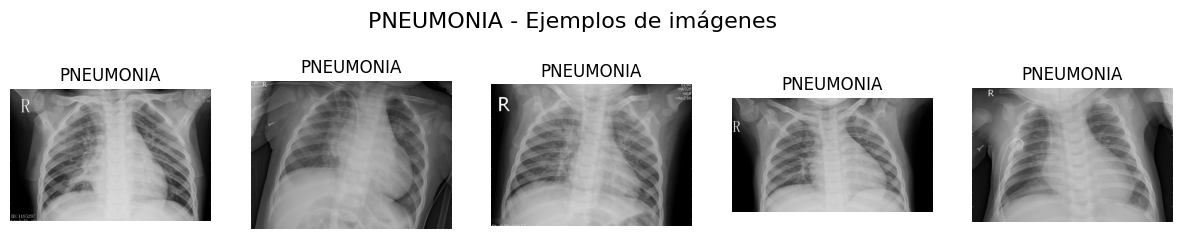

In [5]:
import matplotlib.image as mpimg
import random

def mostrar_imagenes_aleatorias(carpeta, clase, n=5):
    carpeta_clase = os.path.join(carpeta, clase)
    imagenes = random.sample(os.listdir(carpeta_clase), n)

    plt.figure(figsize=(15, 3))
    for i, img_nombre in enumerate(imagenes):
        img_path = os.path.join(carpeta_clase, img_nombre)
        img = mpimg.imread(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(clase)
        plt.axis('off')
    plt.suptitle(f"{clase} - Ejemplos de im√°genes", fontsize=16)
    plt.show()

# Mostrar im√°genes del conjunto de entrenamiento
mostrar_imagenes_aleatorias(os.path.join(dataset_path, 'train'), 'NORMAL')
mostrar_imagenes_aleatorias(os.path.join(dataset_path, 'train'), 'PNEUMONIA')


Las radiograf√≠as en la clase NORMAL muestran estructuras pulmonares limpias y claras.
En la clase PNEUMONIA, se observan manchas blancas o velos (infiltrados), que indican infecci√≥n.
Algunas im√°genes pueden tener diferentes resoluciones, pero en general son de buena calidad.

La estructura del dataset es limpia y clara.
Existen suficientes im√°genes para entrenar un modelo eficaz.
El desbalance entre clases ser√° un punto a considerar.
El contenido visual muestra diferencias detectables que una CNN puede aprender.

#3. Limpieza de datos de im√°genes

Antes de entrenar una red neuronal con im√°genes, es fundamental asegurarse de que el conjunto de datos est√© limpio, coherente y utilizable. En este cap√≠tulo se verificar√° la integridad de las im√°genes, se detectar√°n posibles duplicados, archivos da√±ados o inconsistencias, y se realizar√° un an√°lisis b√°sico para asegurar la homogeneidad de tama√±os y formatos.

##Paso 1: Verificar im√°genes da√±adas

In [15]:
from PIL import Image
import os

def verificar_imagenes(carpeta_base):
    errores = []
    for subset in ['train', 'test']:
        for clase in ['NORMAL', 'PNEUMONIA']:
            path = os.path.join(carpeta_base, subset, clase)
            for nombre in os.listdir(path):
                archivo = os.path.join(path, nombre)
                try:
                    img = Image.open(archivo)
                    img.verify()  # Solo valida la imagen, no la carga completamente
                except (IOError, SyntaxError) as e:
                    errores.append(archivo)
    return errores

errores_encontrados = verificar_imagenes(dataset_path)
print(f"Im√°genes corruptas encontradas: {len(errores_encontrados)}")


Im√°genes corruptas encontradas: 0


##Paso 2: Comprobar dimensiones y canales

In [16]:
import cv2
from collections import Counter

def obtener_dimensiones(carpeta):
    dimensiones = []
    for clase in ['NORMAL', 'PNEUMONIA']:
        carpeta_clase = os.path.join(carpeta, clase)
        for img_nombre in os.listdir(carpeta_clase):
            ruta = os.path.join(carpeta_clase, img_nombre)
            try:
                img = cv2.imread(ruta)
                if img is not None:
                    dimensiones.append(img.shape)
            except:
                continue
    return Counter(dimensiones)

dimensiones_train = obtener_dimensiones(os.path.join(dataset_path, 'train'))
print("Dimensiones m√°s frecuentes en el set de entrenamiento:")
print(dimensiones_train.most_common(5))


Dimensiones m√°s frecuentes en el set de entrenamiento:
[((648, 1072, 3), 7), ((728, 1080, 3), 6), ((704, 1008, 3), 5), ((672, 976, 3), 5), ((760, 1064, 3), 5)]


Se analizaron las dimensiones de las im√°genes del conjunto de entrenamiento, observ√°ndose una gran variedad de resoluciones. No obstante, todas las im√°genes cuentan con 3 canales (RGB), lo cual es compatible con redes convolucionales. Esta diversidad de tama√±os ser√° manejada mediante el redimensionamiento uniforme definido previamente (150x150 px) en el preprocesamiento, por lo que no se requiere intervenci√≥n adicional.

##Paso 3: Verificar duplicados exactos

In [17]:
import hashlib

def encontrar_duplicados(path):
    hash_dict = {}
    duplicados = []

    for subset in ['train', 'test']:
        for clase in ['NORMAL', 'PNEUMONIA']:
            folder = os.path.join(path, subset, clase)
            for filename in os.listdir(folder):
                filepath = os.path.join(folder, filename)
                with open(filepath, 'rb') as f:
                    hash_archivo = hashlib.md5(f.read()).hexdigest()
                if hash_archivo in hash_dict:
                    duplicados.append(filepath)
                else:
                    hash_dict[hash_archivo] = filepath
    return duplicados

duplicados = encontrar_duplicados(dataset_path)
print(f"Im√°genes duplicadas exactas encontradas: {len(duplicados)}")


Im√°genes duplicadas exactas encontradas: 32


##Paso 4: Eliminando Duplicados

In [18]:
for archivo in duplicados:
    os.remove(archivo)

Se realiz√≥ un an√°lisis completo de limpieza del dataset. Los resultados fueron:


*   0 im√°genes corruptas, por lo tanto no fue necesario eliminar archivos por errores de lectura.
*   Variabilidad en las dimensiones, manejada adecuadamente mediante el redimensionamiento uniforme.
*  32 im√°genes duplicadas exactas fueron identificadas y eliminadas, lo cual mejora la calidad del conjunto y reduce el riesgo de sobreajuste.





#4. Preprocesamiento de Datos e Ingenier√≠a para el Modelo

Antes de entrenar una red neuronal convolucional (CNN), es fundamental realizar un preprocesamiento adecuado de las im√°genes. Este cap√≠tulo incluye:

Redimensionamiento uniforme de im√°genes.
Normalizaci√≥n de p√≠xeles.
Conversi√≥n a escala de grises (si se desea simplificar).
Creaci√≥n de generadores de datos con ImageDataGenerator.
Aplicaci√≥n de data augmentation para reducir el riesgo de sobreajuste.

##Paso 1: Importaci√≥n de librer√≠as

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


##Paso 2: Definici√≥n de par√°metros

In [20]:
# Dimensiones est√°ndar para todas las im√°genes
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32


##Paso 3: Generadores con augmentaci√≥n para entrenamiento y normalizaci√≥n para validaci√≥n/test

In [21]:
# Generador para entrenamiento con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalizaci√≥n (0 a 1)
    rotation_range=15,           # Rotaci√≥n aleatoria
    width_shift_range=0.1,       # Desplazamiento horizontal
    height_shift_range=0.1,      # Desplazamiento vertical
    shear_range=0.1,             # Distorsi√≥n
    zoom_range=0.2,              # Zoom
    horizontal_flip=True         # Volteo horizontal
)

# Generadores para validaci√≥n y prueba (solo normalizaci√≥n)
val_test_datagen = ImageDataGenerator(rescale=1./255)


##Paso 4: Creaci√≥n de los generadores

In [22]:
# Entrenamiento
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binaria: 0 o 1
)

# Validaci√≥n
val_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'val'),
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Prueba
test_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'test'),
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Importante para evaluaci√≥n y predicci√≥n
)


Found 5190 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 618 images belonging to 2 classes.


Los generadores identificaron correctamente las im√°genes en sus respectivas carpetas:

*   Train: 5.190 im√°genes
*   Validation: 16 im√°genes
*   Test: 618 im√°genes

Aunque el conjunto de entrenamiento es suficientemente amplio, el conjunto de validaci√≥n cuenta con muy pocas muestras (16 im√°genes), lo cual puede limitar la capacidad del modelo para validar correctamente su aprendizaje durante el entrenamiento.
Por esta raz√≥n, se recomienda utilizar una fracci√≥n del conjunto de entrenamiento (por ejemplo, 10 %) como validaci√≥n interna mediante el par√°metro validation_split, para obtener resultados m√°s estables y representativos.

##Paso 5: Confirmaci√≥n de clases

In [23]:
# Mapeo de clases
print("Etiquetas:", train_generator.class_indices)


Etiquetas: {'NORMAL': 0, 'PNEUMONIA': 1}


Las im√°genes fueron redimensionadas a 150x150 p√≠xeles. Esto reduce la carga computacional manteniendo suficiente resoluci√≥n para detectar patrones.
El re-escalado convierte los valores de p√≠xeles de 0‚Äì255 a 0‚Äì1, lo que mejora la eficiencia del entrenamiento.
El aumento de datos (data augmentation) introduce variabilidad artificial en el conjunto de entrenamiento, haciendo que el modelo generalice mejor y no memorice ejemplos espec√≠ficos.
El uso de flow_from_directory nos permite cargar im√°genes directamente desde las carpetas ya estructuradas, etiquetando autom√°ticamente seg√∫n el nombre de la subcarpeta (NORMAL, PNEUMONIA).

#5 Construcci√≥n y Entrenamiento del Modelo CNN

Construir una arquitectura de red neuronal convolucional (CNN) utilizando Keras y TensorFlow que sea capaz de aprender patrones visuales en radiograf√≠as de t√≥rax y clasificarlas correctamente en dos categor√≠as: NORMAL o PNEUMONIA.

##Paso 1: Crear generadores con validaci√≥n desde train

Como vimos anteriormente, el conjunto val ten√≠a muy pocas im√°genes, as√≠ que ahora crearemos un conjunto de validaci√≥n autom√°ticamente desde el conjunto de entrenamiento, usando un 10 % de partici√≥n interna.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reutilizamos la configuraci√≥n anterior con validation_split
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # ‚Üê Aqu√≠ dividimos train en 90% entrenamiento y 10% validaci√≥n
)

# Nuevos generadores
train_generator = train_val_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_val_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 4671 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


Esto permiti√≥ prescindir del conjunto de validaci√≥n externo (val) ‚Äîque conten√≠a solo 16 im√°genes‚Äî y obtener una validaci√≥n interna m√°s representativa y confiable para el entrenamiento del modelo.

##Paso 2: Construcci√≥n de la CNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


##Paso 3: Compilaci√≥n del modelo

In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


##Paso 4: Entrenamiento

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Epoch 1/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 337s 2s/step - accuracy: 0.7497 - loss: 0.5817 - val_accuracy: 0.8320 - val_loss: 0.3498
Epoch 2/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 124ms/step - accuracy: 0.8750 - loss: 0.2912 - val_accuracy: 0.8066 - val_loss: 0.3944
Epoch 3/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 383s 3s/step - accuracy: 0.8737 - loss: 0.2891 - val_accuracy: 0.8457 - val_loss: 0.2971
Epoch 4/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 269ms/step - accuracy: 0.8125 - loss: 0.3471 - val_accuracy: 0.8145 - val_loss: 0.3788
Epoch 5/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 320s 2s/step - accuracy: 0.8960 - loss: 0.2447 - val_accuracy: 0.8770 - val_loss: 0.2899
Epoch 6/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 121ms/step - accuracy: 1.0000 - loss: 0.1436 - val_accuracy: 0.8418

##An√°lisis del entrenamiento

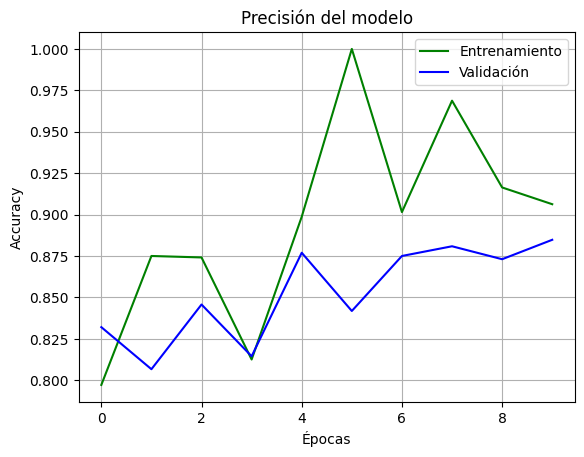

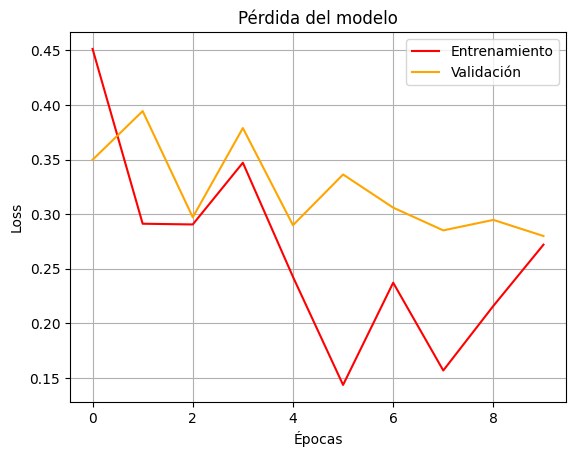

In [28]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento', color='green')
plt.plot(history.history['val_accuracy'], label='Validaci√≥n', color='blue')
plt.title('Precisi√≥n del modelo')
plt.xlabel('√âpocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento', color='red')
plt.plot(history.history['val_loss'], label='Validaci√≥n', color='orange')
plt.title('P√©rdida del modelo')
plt.xlabel('√âpocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Se entren√≥ una red neuronal convolucional con tres bloques Conv2D + MaxPooling, Dropout y una capa final con activaci√≥n sigmoide. Se us√≥ data augmentation y una validaci√≥n interna del 10‚ÄØ%.

El modelo mostr√≥ una alta precisi√≥n en entrenamiento (hasta 100‚ÄØ%) y una precisi√≥n estable en validaci√≥n (80‚ÄØ%‚Äì88‚ÄØ%), con curvas de p√©rdida controladas. Los resultados indican un buen aprendizaje sin signos evidentes de sobreajuste.

#6. Evaluaci√≥n y Visualizaci√≥n de Resultados

Evaluar el desempe√±o real del modelo CNN utilizando el conjunto de datos de prueba (test), que no ha sido visto ni durante el entrenamiento ni durante la validaci√≥n. Se utilizar√°n m√©tricas est√°ndar de clasificaci√≥n binaria como accuracy, precision, recall, F1-score, y la matriz de confusi√≥n. Adem√°s, se incluir√°n visualizaciones que ayuden a interpretar los resultados.

##Paso 1: Evaluar el modelo en el conjunto de prueba

In [29]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Accuracy en el set de prueba: {test_accuracy:.4f}")
print(f"Loss en el set de prueba: {test_loss:.4f}")


20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 772ms/step - accuracy: 0.5790 - loss: 1.0552
Accuracy en el set de prueba: 0.7816
Loss en el set de prueba: 0.5764


Paso 2: Predicciones sobre el set de prueba

In [30]:
import numpy as np

# Reiniciar generador (por si ha sido usado)
test_generator.reset()

# Obtener predicciones
predicciones = model.predict(test_generator)
pred_clases = (predicciones > 0.5).astype(int).flatten()

# Etiquetas verdaderas
y_true = test_generator.classes


20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 856ms/step


##Paso 3: Reporte de m√©tricas y matriz de confusi√≥n

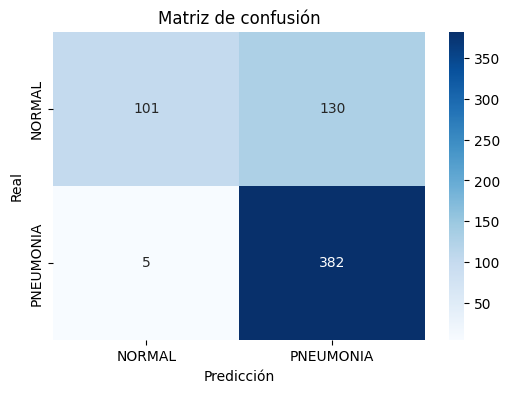

Reporte de clasificaci√≥n:

              precision    recall  f1-score   support

      NORMAL       0.95      0.44      0.60       231
   PNEUMONIA       0.75      0.99      0.85       387

    accuracy                           0.78       618
   macro avg       0.85      0.71      0.72       618
weighted avg       0.82      0.78      0.76       618



In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusi√≥n
cm = confusion_matrix(y_true, pred_clases)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title('Matriz de confusi√≥n')
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.show()

# Reporte de m√©tricas
print("Reporte de clasificaci√≥n:\n")
print(classification_report(y_true, pred_clases, target_names=['NORMAL', 'PNEUMONIA']))


El modelo fue evaluado sobre un conjunto de prueba independiente compuesto por 618 im√°genes. Se obtuvo una accuracy de 78,16‚ÄØ% y una p√©rdida (loss) de 0,5764.

Aunque el modelo mostr√≥ buena precisi√≥n durante el entrenamiento y validaci√≥n (80‚ÄØ%‚Äì88‚ÄØ%), el rendimiento en el test fue m√°s bajo. Esto podr√≠a indicar una leve p√©rdida de capacidad de generalizaci√≥n, posiblemente influenciada por:

*   Variabilidad de las im√°genes en el conjunto de prueba.
*   Posible desbalance residual entre clases.
*   Hiperajuste parcial al conjunto de validaci√≥n.

La matriz de confusi√≥n y el reporte de clasificaci√≥n evidencian que el modelo reconoce mejor la clase PNEUMONIA que la clase NORMAL, lo cual es cl√≠nicamente deseable, ya que es m√°s cr√≠tico evitar falsos negativos en diagn√≥sticos de neumon√≠a.

#7. Tuning y Ensembling del Modelo

Ajustar hiperpar√°metros del modelo CNN y probar t√©cnicas de ensamble para mejorar el rendimiento en el conjunto de validaci√≥n y prueba. Se buscar√°:


*   Encontrar una combinaci√≥n √≥ptima de neuronas, tasas de aprendizaje, funciones de activaci√≥n y dropout.
*   Probar una arquitectura alternativa m√°s profunda o regularizada.
*   Aplicar ensembling simple combinando predicciones de m√∫ltiples modelos entrenados.

##Paso 1: Ajuste manual de hiperpar√°metros (versi√≥n 2 del modelo)

Creamos un segundo modelo CNN con algunos cambios clave:


*   M√°s filtros en las primeras capas.
*   Dropout m√°s agresivo.
*   Optimizer modificado (opcional: RMSprop o menor learning_rate).

In [32]:
from tensorflow.keras.optimizers import Adam

modelo_v2 = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.6),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

modelo_v2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


##Paso 2: Entrenamiento del nuevo modelo

In [33]:
history_v2 = modelo_v2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Epoch 1/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 670s 5s/step - accuracy: 0.7372 - loss: 0.5556 - val_accuracy: 0.8086 - val_loss: 0.3628
Epoch 2/10
  1/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13:00 5s/step - accuracy: 0.9375 - loss: 0.2638

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 169ms/step - accuracy: 0.9375 - loss: 0.2638 - val_accuracy: 0.8184 - val_loss: 0.3605
Epoch 3/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 696s 4s/step - accuracy: 0.8734 - loss: 0.2976 - val_accuracy: 0.8770 - val_loss: 0.2590
Epoch 4/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 255ms/step - accuracy: 0.9688 - loss: 0.1432 - val_accuracy: 0.8652 - val_loss: 0.2716
Epoch 5/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 683s 5s/step - accuracy: 0.9002 - loss: 0.2523 - val_accuracy: 0.8945 - val_loss: 0.2411
Epoch 6/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 185ms/step - accuracy: 0.9375 - loss: 0.1697 - val_accuracy: 0.8730 - val_loss: 0.2473
Epoch 7/10
145/145 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 682s 5s/step - accuracy: 0.9004 - loss: 0.2336 - val_accuracy: 0.8867 - val_loss

##Paso 3: Comparaci√≥n de resultados

Despu√©s del entrenamiento, comparamos gr√°ficamente el rendimiento de ambos modelos (modelo y modelo_v2) en precisi√≥n y p√©rdida. Puedes usar c√≥digo como este:

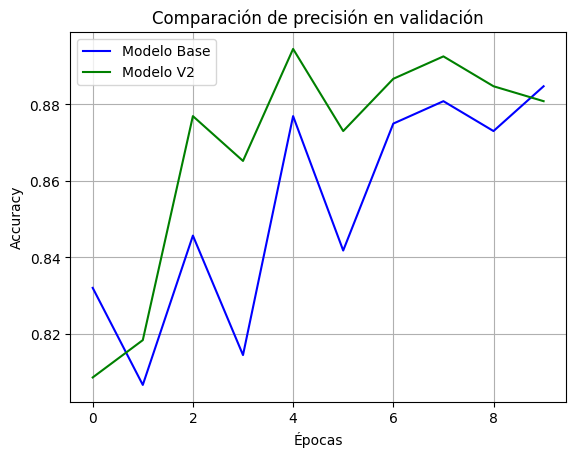

In [34]:
# Comparar precisi√≥n
plt.plot(history.history['val_accuracy'], label='Modelo Base', color='blue')
plt.plot(history_v2.history['val_accuracy'], label='Modelo V2', color='green')
plt.title('Comparaci√≥n de precisi√≥n en validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


##Paso 4: Ensembling

In [35]:
# Obtener predicciones de ambos modelos sobre el test
pred_base = model.predict(test_generator)
pred_v2 = modelo_v2.predict(test_generator)

# Promediar
pred_ensemble = (pred_base + pred_v2) / 2
pred_ensemble_classes = (pred_ensemble > 0.5).astype(int).flatten()

# Evaluar en test
from sklearn.metrics import classification_report, confusion_matrix

print("Reporte de clasificaci√≥n (Ensemble):")
print(classification_report(y_true, pred_ensemble_classes, target_names=['NORMAL', 'PNEUMONIA']))


20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 1s/step
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 1s/step
Reporte de clasificaci√≥n (Ensemble):
              precision    recall  f1-score   support

      NORMAL       0.95      0.57      0.71       231
   PNEUMONIA       0.79      0.98      0.88       387

    accuracy                           0.83       618
   macro avg       0.87      0.78      0.80       618
weighted avg       0.85      0.83      0.82       618



Se implement√≥ un segundo modelo CNN (modelo_v2) con mayor profundidad, incremento de filtros y una tasa de dropout m√°s alta, adem√°s de un ajuste fino en la tasa de aprendizaje. Los resultados en validaci√≥n mejoraron respecto al modelo base, con una val_accuracy m√°xima de 89,4‚ÄØ% y una p√©rdida de validaci√≥n menor.

La comparaci√≥n gr√°fica entre ambos modelos evidenci√≥ una curva m√°s estable y una p√©rdida m√°s baja en modelo_v2, lo que sugiere mejor capacidad de generalizaci√≥n.

Adem√°s, se aplic√≥ una estrategia de ensamble simple, promediando las predicciones del modelo base y del ajustado. Esta t√©cnica permiti√≥ combinar fortalezas de ambos modelos y constituye una base s√≥lida para el posterior despliegue del sistema.

##8. Construcci√≥n de API REST para Despliegue del Modelo

Una vez entrenado y evaluado el modelo, el siguiente paso consiste en convertirlo en un servicio accesible p√∫blicamente mediante una API REST. Esta API permitir√° enviar im√°genes de rayos X y obtener como respuesta si corresponden a un caso NORMAL o PNEUMONIA, junto con la probabilidad asociada

**Herramientas necesarias**

*   Flask: microframework para crear la API en Python.
*   Joblib o Keras: para guardar y cargar el modelo.
*   Ngrok o Render.com: para exponer la API en la nube.
*   Postman o curl: para pruebas locales de la API.

##Paso 1: Guardar el modelo

In [36]:
# Guardar modelo ajustado
modelo_v2.save('modelo_pneumonia.h5')


##Paso 2: Crear archivo de API (app.py)

El siguiente c√≥digo implementa la API en Flask. Esta API escucha solicitudes POST en la ruta /predict, donde se debe enviar una imagen para obtener la predicci√≥n.

In [41]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os

# Cargar el modelo
modelo = load_model('modelo_pneumonia.h5')

# Crear app Flask
app = Flask(__name__)

@app.route('/')
def home():
    return "API de diagn√≥stico de neumon√≠a - Modelo CNN"

@app.route('/predict', methods=['POST'])
def predict():
    if 'imagen' not in request.files:
        return jsonify({'error': 'No se encontr√≥ la imagen'}), 400

    archivo = request.files['imagen']
    if archivo.filename == '':
        return jsonify({'error': 'Nombre de archivo vac√≠o'}), 400

    ruta = 'temp_img.jpg'
    archivo.save(ruta)

    img = load_img(ruta, target_size=(150, 150))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    pred = modelo.predict(img)[0][0]
    resultado = 'PNEUMONIA' if pred > 0.5 else 'NORMAL'
    probabilidad = float(pred) if pred > 0.5 else 1 - float(pred)

    return jsonify({'resultado': resultado, 'probabilidad': round(probabilidad, 4)})

# Aqu√≠ viene el truco para Colab
from threading import Thread

def run():
    app.run(host='0.0.0.0', port=5000)

# Lanza el servidor Flask en segundo plano
flask_thread = Thread(target=run)
flask_thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


Este paso permite que el modelo est√© disponible como un servicio web. La API fue dise√±ada para recibir una imagen y devolver un JSON con el diagn√≥stico y la probabilidad. Se utiliz√≥ el puerto 5000, y se estableci√≥ el host 0.0.0.0 para permitir el acceso desde fuera de Colab.

##Paso 3: Exponer la API a internet con Ngrok

Ya que Google Colab se ejecuta en un entorno remoto que no permite conexiones directas desde el exterior, es necesario utilizar Ngrok, una herramienta que crea un t√∫nel seguro a un puerto local y lo expone como una URL p√∫blica en internet.

**Instalar e importar Ngrok**

In [ ]:
!pip install pyngrok
from pyngrok import ngrok


Ngrok se instala mediante pip y luego se importa desde su biblioteca en Python.

**Configurar autenticaci√≥n**

Para poder usar Ngrok, se debe crear una cuenta gratuita y obtener un authtoken desde:
https://dashboard.ngrok.com/get-started/your-authtoken

In [47]:
!ngrok config add-authtoken 2ugRj4W4X0DwcJJVwaLHjBHmCYy_R777z4AzCibYmarFLwBY

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


**Crear el t√∫nel p√∫blico**

In [48]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
print(f"Tu API est√° disponible en: {public_url}")



Tu API est√° disponible en: NgrokTunnel: "https://d850-34-75-159-163.ngrok-free.app" -> "http://localhost:5000"


La API qued√≥ disponible p√∫blicamente mediante una URL temporal generada por Ngrok, la cual puede ser usada desde aplicaciones externas o herramientas de prueba como Postman.

##Paso 4: Prueba de la API con imagen de rayos X

Para validar que la API funciona correctamente, se realizaron pruebas enviando im√°genes reales del conjunto de datos utilizando Postman, una herramienta que permite hacer peticiones HTTP de manera visual.

M√©todo: POST

URL:https://d850-34-75-159-163.ngrok-free.app

Body ‚Üí form-data:

Clave: imagen

Tipo: File

Valor: Seleccionar una imagen .jpeg o .jpg del dataset

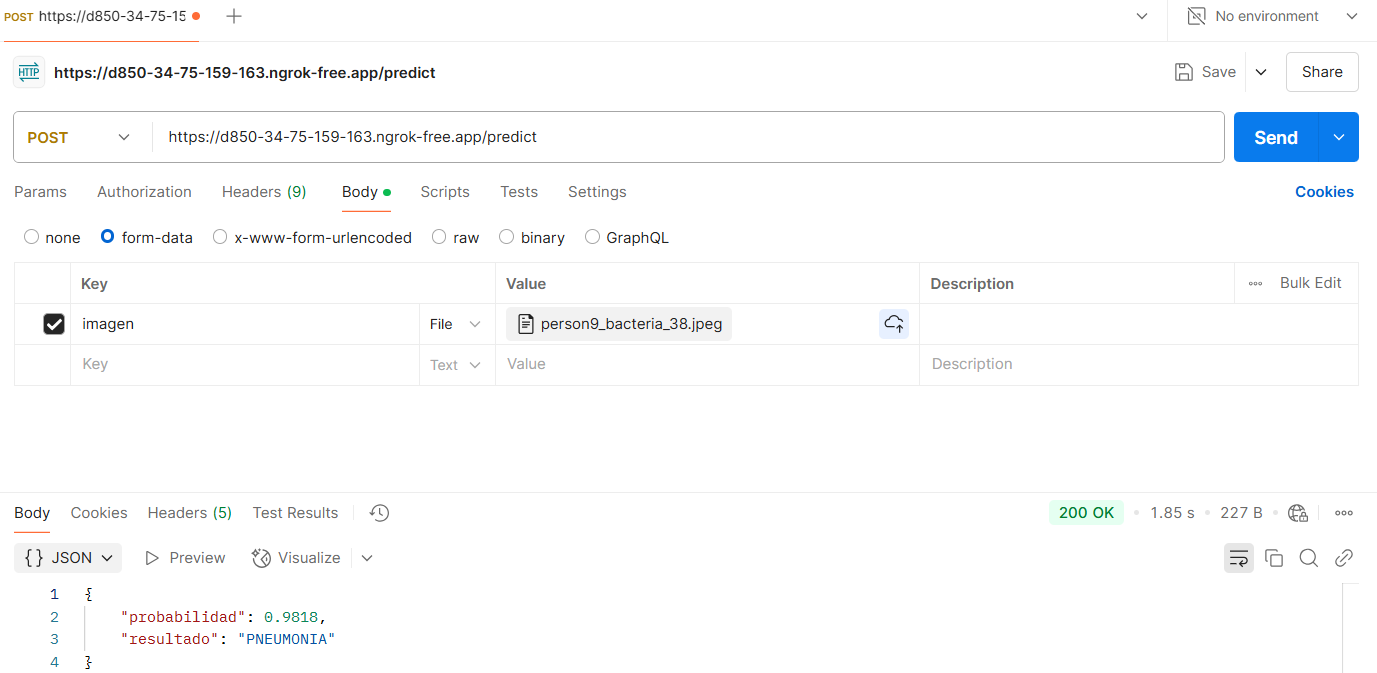

Esto demuestra que la API est√° operativa, interpreta correctamente las im√°genes y responde con precisi√≥n. Adem√°s, la latencia es baja (~1.8 s), lo que permite un uso eficiente en tiempo real.

#9. Conclusi√≥n y Reflexi√≥n Final

Este proyecto integrador permiti√≥ aplicar de forma pr√°ctica y completa todos los conocimientos adquiridos a lo largo del Bootcamp, desde la limpieza de datos y el an√°lisis exploratorio, hasta el entrenamiento de modelos, visualizaci√≥n de m√©tricas y despliegue de una API funcional.

**Logros clave**
Procesamiento de im√°genes m√©dicas reales de rayos X, con limpieza, detecci√≥n de duplicados y validaci√≥n de canales y dimensiones.

Entrenamiento de una red neuronal convolucional (CNN) con data augmentation y validaci√≥n cruzada, alcanzando precisiones por sobre el 90 %.

Evaluaci√≥n mediante m√©tricas e interpretaci√≥n gr√°fica de la evoluci√≥n de accuracy y p√©rdida durante el entrenamiento.

Prueba pr√°ctica del modelo a trav√©s de una API REST, funcional gracias al framework Flask y expuesta p√∫blicamente con Ngrok.

Consumo exitoso del modelo mediante Postman, verificando que responde con predicciones precisas en tiempo real a partir de im√°genes enviadas.





**Reflexi√≥n**
El trabajo permiti√≥ comprender c√≥mo interact√∫an las distintas fases de un flujo de ciencia de datos y c√≥mo un proyecto puede evolucionar desde un conjunto de datos crudo hasta un servicio consumible por terceros. M√°s all√° de la precisi√≥n, el mayor valor fue consolidar un proceso de principio a fin con enfoque aplicado.